In [3]:
#Required dependancies
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from config import db_password
import psycopg2
import plotly.express as px

In [4]:
#settings to connect to postgresql to import datasets
conn = psycopg2.connect(host="localhost", port = 5432, database="Group-Project", user="postgres", password=db_password)
cur = conn.cursor()

In [5]:
#import table from postgresql database
cur.execute("""SELECT * FROM demographics""")

In [6]:
#returns all rows of the selected table
query_results = cur.fetchall()
print(query_results)

[(0, 'US', 'United States', None, None, None, None, None, '52,373,312', '34,158,051', '11,650,730', '11,717,266', 47.7, 31.1, 10.6, 10.7, '44,535,197', '45,947,035', '20,794,975', '21,558,480', 33.5, 34.6, 15.7, 16.2, '39,343,718', '47,642,763', '39,571,702', '32,310,253', 24.8, 30.0, 24.9, 20.3, '35,715,625', '52,168,981', '49,864,428', '44,462,605', 19.6, 28.6, 27.4, 24.4, '26,472,261', '59,472,748', '63,756,905', '70,920,162', 12.0, 27.0, 28.9, 32.1, None, None, None, None, None, None, None, None, None, '160,611,064', '147,677,360', '12,933,704', 8.1, '65,712', None), (1000, 'AL', 'Alabama', None, None, None, None, None, '1,062,306', '468,269', '136,287', '141,936', 58.7, 25.9, 7.5, 7.8, '964,840', '704,207', '278,205', '270,063', 43.5, 31.8, 12.5, 12.2, '843,638', '749,591', '553,512', '399,228', 33.1, 29.4, 21.7, 15.7, '714,081', '877,216', '746,495', '549,608', 24.7, 30.4, 25.9, 19.0, '458,922', '1,022,839', '993,344', '845,772', 13.8, 30.8, 29.9, 25.5, None, None, None, None, No

In [7]:
#creates a df from the fetchall data above
demo_raw_df = pd.DataFrame(query_results,columns=["FIPS", 
    "State", 
    "County",
    "2003 Rural-urban Continuum Code", 
    "2003 Urban Influence Code", 
    "2013 Rural-urban Continuum Code", 
    "2013 Urban Influence Code", 
    "City/Suburb/Town/Rural 2013", 
    "Less than HSD(1970)", 
    "High school diploma only(1970)", 
    "Some college (1-3 years)(1970)", 
    "Four or more years of college(1970)", 
    "Percent adults with less than HSD(1970)", 
    "Percent adults with HSD only(1970)", 
    "Percent adults 1-3 years college(1970)", 
    "Percent with four or more years of college(1970)", 
    "Less than HSD(1980)", 
    "HSD only(1980)", 
    "Some college (1-3 years)(1980)", 
    "Four or more years of college (1980)",
    "Percent with less than HSD(1980)", 
    "Percent with HSD only(1980)", 
    "Percent with some college (1-3 years)(1980)", 
    "Percent with four or more years of college(1980)", 
    "Less than HSD(1990)", 
    "HSD only(1990)", 
    "Some college or ASD(1990)", 
    "BS degree or higher(1990)", 
    "Percent with less than HSD(1990)", 
    "Percent with HSD only(1990)", 
    "Percent with some college or ASD(1990)",
    "Percent with a BS degree or higher(1990)", 
    "Less than HSD(2000)", 
    "HSD only(2000)", 
    "Some college or ASD(2000)", 
    "BS degree or higher(2000)", 
    "Percent with less than HSD(2000)", 
    "Percent with HSD only(2000)",
    "Percent completing some college or ASD(2000)", 
    "Percent with BS degree or higher(2000)",
    "Less than HSD(2015-19)", 
    "HSD only(2015-19)", 
    "Some college or ASD(2015-19)", 
    "BS degree or higher 2015-19", 
    "Percent with less than HSD(2015-19)", 
    "Percent with HSD only(2015-19)", 
    "Percent completing some college or ASD(2015-19)",
    "Percent with BS degree or higher(2015-19)",
    "bkey",
    "Population_2010",
    "UIC_2013",
    "Description",
    "City/Suburb/Town/Rural",
    "Rural_urban_continuum_code_2013",
    "Urban_influence_code_2013",
    "Community_Type",
    "Metro_2013",
    "Civilian_labor_force_2020",
    "Employed_2020",
    "Unemployed_2020",
    "Unemployment_rate_2020",
    "Median_Household_Income_2019",
    "Med_HH_Income_Percent_of_State_Total_2019"
])

In [8]:
#views the newly created df
demo_raw_df

FIPS State               County  2003 Rural-urban Continuum Code  \
0         0    US        United States                              NaN   
1      1000    AL              Alabama                              NaN   
2      1001    AL             Autauga                               2.0   
3      1003    AL             Baldwin                               4.0   
4      1005    AL             Barbour                               6.0   
...     ...   ...                  ...                              ...   
3278  72145    PR  Vega Baja Municipio                              1.0   
3279  72147    PR    Vieques Municipio                              7.0   
3280  72149    PR   Villalba Municipio                              2.0   
3281  72151    PR    Yabucoa Municipio                              1.0   
3282  72153    PR      Yauco Municipio                              3.0   

      2003 Urban Influence Code  2013 Rural-urban Continuum Code  \
0                           NaN                              NaN   
1                           NaN                              NaN   
2                           2.0                              2.0   
3                           5.0                              3.0   
4                           6.0                              6.0   
...                         ...                              ...   
3278                        1.0                              1.0   
3279                       12.0                              7.0   
3280                        2.0                              2.0   
3281                        1.0                              1.0   
3282                        2.0                              2.0   

      2013 Urban Influence Code City/Suburb/Town/Rural 2013  \
0                           NaN                        None   
1                           NaN                        None   
2                           2.0                        City   
3                           2.0                        City   
4                           6.0                        Town   
...                         ...                         ...   
3278                        1.0                        City   
3279                       12.0                       Rural   
3280                        2.0                        City   
3281                        1.0                        City   
3282                        2.0                        City   

     Less than HSD(1970) High school diploma only(1970)  ...  \
0             52,373,312                     34,158,051  ...   
1              1,062,306                        468,269  ...   
2                  6,611                          3,757  ...   
3                 18,726                          8,426  ...   
4                  8,120                          2,242  ...   
...                  ...                            ...  ...   
3278                None                           None  ...   
3279                None                           None  ...   
3280                None                           None  ...   
3281                None                           None  ...   
3282                None                           None  ...   

     Rural_urban_continuum_code_2013 Urban_influence_code_2013  \
0                                NaN                       NaN   
1                                NaN                       NaN   
2                                2.0                       2.0   
3                                3.0                       2.0   
4                                6.0                       6.0   
...                              ...                       ...   
3278                             1.0                       1.0   
3279                             7.0                      12.0   
3280                             2.0                       2.0   
3281                             1.0                       1.0   
3282                             2.0 

In [9]:
# Read in the data for brewery listings and create a Pandas DataFrame.
# Loading data
file_path = "../Resources/data/brewery_listing.csv" 
brewery_list_df= pd.read_csv(file_path)
brewery_list_df.head()

key                             Name                   Address  \
0  Anchorage AK  49th State Brewing Co Anchorage             717 W 3rd Ave   
1  Anchorage AK             Anchorage Brewing Co            148 W 91st Ave   
2  Anchorage AK          Broken Tooth Brewing Co             2021 Spar Ave   
3  Anchorage AK              Cynosure Brewing Co  144 E Potter Dr - Unit E   
4  Anchorage AK                Glacier Brewhouse             737 W 5th Ave   

        City  ST    Zip     County                           Website  \
0  Anchorage  AK  99501  Anchorage     49statebrewing.com/anchorage/   
1  Anchorage  AK  99515  Anchorage      anchoragebrewingcompany.com/   
2  Anchorage  AK  99501  Anchorage           brokentoothbrewing.net/   
3  Anchorage  AK  99518  Anchorage  www.facebook.com/CynosureBrewing   
4  Anchorage  AK  99501  Anchorage         www.glacierbrewhouse.com/   

          Phone   Type New_Revised Updated  FIPS  
0  907-277 7727     BP         NaN     NaN  2020  
1  907-360-5104  BC/TR         NaN     NaN  2020  
2  907-278-4999     BC         NaN     NaN  2020  
3  907-563-2966  BC/TR         NaN     NaN  2020  
4  907-274-2739     BP         NaN     NaN  2020

In [10]:
#aggregating to determine the number of breweries per fips (county)
brewery_count_df=pd.pivot_table(brewery_list_df,index='FIPS',aggfunc='count')
brewery_count_df.head()

Address  City  County  Name  New_Revised  Phone  ST  Type  Updated  \
FIPS                                                                       
1003        3     3       3     3            0      3   3     3        0   
1015        1     1       1     1            0      1   1     1        0   
1043        1     1       1     1            0      1   1     1        0   
1055        1     1       1     1            0      1   1     1        0   
1069        1     1       1     1            0      1   1     1        0   

      Website  Zip  key  
FIPS                     
1003        3    3    3  
1015        1    1    1  
1043        1    1    1  
1055        1    1    1  
1069        1    1    1

In [11]:
# rename address column as Brewery_Count 
brewery_count_df=brewery_count_df.rename(columns={'Address':'Brewery_Count'})
brewery_count_df.head()

Brewery_Count  City  County  Name  New_Revised  Phone  ST  Type  \
FIPS                                                                    
1003              3     3       3     3            0      3   3     3   
1015              1     1       1     1            0      1   1     1   
1043              1     1       1     1            0      1   1     1   
1055              1     1       1     1            0      1   1     1   
1069              1     1       1     1            0      1   1     1   

      Updated  Website  Zip  key  
FIPS                              
1003        0        3    3    3  
1015        0        1    1    1  
1043        0        1    1    1  
1055        0        1    1    1  
1069        0        1    1    1

In [12]:
#identify redundant coulmns
remove=[1,2,3,4,5,6,7,8,9,10,11]

In [13]:
#eliminating redundant coulmns and am left with df of brewery counts by fips
brewery_count_df=brewery_count_df.drop(brewery_count_df.columns[remove],axis=1)
brewery_count_df.head()

Brewery_Count
FIPS               
1003              3
1015              1
1043              1
1055              1
1069              1

In [14]:
# adjusted pandas settings so all columns are displayed
pd.set_option('display.max_columns', None)

In [15]:
#reviewing the data to see if nulls are present
demo_raw_df.describe()


FIPS  2003 Rural-urban Continuum Code  \
count   3283.000000                      3221.000000   
mean   31308.242766                         5.057125   
std    16343.477485                         2.701247   
min        0.000000                         1.000000   
25%    19016.000000                         3.000000   
50%    30017.000000                         6.000000   
75%    46100.000000                         7.000000   
max    72153.000000                         9.000000   

       2003 Urban Influence Code  2013 Rural-urban Continuum Code  \
count                3221.000000                      3221.000000   
mean                    5.371624                         4.936976   
std                     3.483776                         2.724413   
min                     1.000000                         1.000000   
25%                     2.000000                         2.000000   
50%                     5.000000                         6.000000   
75%                     8.000000                         7.000000   
max                    12.000000                         9.000000   

       2013 Urban Influence Code  Percent adults with less than HSD(1970)  \
count                3221.000000                              3186.000000   
mean                    5.187830                                55.163685   
std                     3.506753                                12.804811   
min                     1.000000                                11.800000   
25%                     2.000000                                45.500000   
50%                     5.000000                                53.700000   
75%                     8.000000                                65.700000   
max                    12.000000                                93.000000   

       Percent adults with HSD only(1970)  \
count                         3186.000000   
mean                            28.465474   
std                              8.142067   
min                              4.400000   
25%                             22.000000   
50%                             29.500000   
75%                             35.000000   
max                             53.800000   

       Percent adults 1-3 years college(1970)  \
count                             3186.000000   
mean                                 8.982423   
std                                  3.643638   
min                                  0.000000   
25%                                  6.200000   
50%                                  8.600000   
75%                                 11.300000   
max                                 29.000000   

       Percent with four or more years of college(1970)  \
count                                       3186.000000   
mean                                           7.389140   
std                                            3.955551   
min                                            0.000000   
25%                                            4.800000   
50%                                            6.500000   
75%                                            8.800000   
max                                           38.600000   

       Percent with less than HSD(1980)  Percent with HSD only(1980)  \
count                       3267.000000                  3267.000000   
mean                          41.178114                    34.356872   
std                           12.997850                     7.537762   
min                            4.700000                    11.000000   
25%                           31.700000                    28.700000   
50%                           39.200000                    35.000000   
75%                           51.400000                    40.200000   
max                           82.400000                    54.300000   

       Percent with some college (1-3 years)(1980)  \
count                                  3267.000000   
mean                                     13.034619   
std

In [16]:
#counting nulls
demo_raw_df.isnull().sum().sum()

2593

In [17]:
# looking at some of the nulls
demo_raw_df.head()

FIPS State         County  2003 Rural-urban Continuum Code  \
0     0    US  United States                              NaN   
1  1000    AL        Alabama                              NaN   
2  1001    AL       Autauga                               2.0   
3  1003    AL       Baldwin                               4.0   
4  1005    AL       Barbour                               6.0   

   2003 Urban Influence Code  2013 Rural-urban Continuum Code  \
0                        NaN                              NaN   
1                        NaN                              NaN   
2                        2.0                              2.0   
3                        5.0                              3.0   
4                        6.0                              6.0   

   2013 Urban Influence Code City/Suburb/Town/Rural 2013 Less than HSD(1970)  \
0                        NaN                        None          52,373,312   
1                        NaN                        None           1,062,306   
2                        2.0                        City               6,611   
3                        2.0                        City              18,726   
4                        6.0                        Town               8,120   

  High school diploma only(1970) Some college (1-3 years)(1970)  \
0                     34,158,051                     11,650,730   
1                        468,269                        136,287   
2                          3,757                            933   
3                          8,426                          2,334   
4                          2,242                            581   

  Four or more years of college(1970)  \
0                          11,717,266   
1                             141,936   
2                                 767   
3                               2,038   
4                                 861   

   Percent adults with less than HSD(1970)  \
0                                     47.7   
1                                     58.7   
2                                     54.8   
3                                     59.4   
4                                     68.8   

   Percent adults with HSD only(1970)  Percent adults 1-3 years college(1970)  \
0                                31.1                                    10.6   
1                                25.9                                     7.5   
2                                31.1                                     7.7   
3                                26.7                                     7.4   
4                                19.0                                     4.9   

   Percent with four or more years of college(1970) Less than HSD(1980)  \
0                                              10.7          44,535,197   
1                                               7.8             964,840   
2                                               6.4               7,074   
3                                               6.5              18,125   
4                                               7.3               7,759   

  HSD only(1980) Some college (1-3 years)(1980)  \
0     45,947,035                     20,794,975   
1        704,207                        278,205   
2          6,145                          2,104   
3         15,380                          6,602   
4          3,671                          1,362   

  Four or more years of college (1980)  Percent with less than HSD(1980)  \
0                           21,558,480                              33.5   
1                              270,063                              43.5   
2                                2,117                              40.6   
3                                5,498                              39.7   
4                                1,300                              55.1   

   Percent with HSD only(1980)  Percent with some college (1-3 years)(1980)  \
0                         34.6  

In [18]:
#reviewing the data when final df was missing WI and WY breweries (they are all present here..) 
demo_raw_df.loc[(demo_raw_df['State']=="WI")]

FIPS State      County  2003 Rural-urban Continuum Code  \
3107  55000    WI   Wisconsin                              NaN   
3108  55001    WI      Adams                               8.0   
3109  55003    WI    Ashland                               7.0   
3110  55005    WI     Barron                               6.0   
3111  55007    WI   Bayfield                               8.0   
...     ...   ...         ...                              ...   
3175  55133    WI   Waukesha                               1.0   
3176  55135    WI    Waupaca                               6.0   
3177  55137    WI   Waushara                               8.0   
3178  55139    WI  Winnebago                               3.0   
3179  55141    WI       Wood                               4.0   

      2003 Urban Influence Code  2013 Rural-urban Continuum Code  \
3107                        NaN                              NaN   
3108                        7.0                              8.0   
3109                       11.0                              7.0   
3110                        6.0                              6.0   
3111                        7.0                              8.0   
...                         ...                              ...   
3175                        1.0                              1.0   
3176                        6.0                              6.0   
3177                        6.0                              6.0   
3178                        2.0                              3.0   
3179                        5.0                              4.0   

      2013 Urban Influence Code City/Suburb/Town/Rural 2013  \
3107                        NaN                        None   
3108                        6.0                        Town   
3109                       11.0                       Rural   
3110                        6.0                        Town   
3111                        6.0                        Town   
...                         ...                         ...   
3175                        1.0                        City   
3176                        6.0                        Town   
3177                        6.0                        Town   
3178                        2.0                        City   
3179                        5.0                      Suburb   

     Less than HSD(1970) High school diploma only(1970)  \
3107           1,060,531                        811,048   
3108               3,342                          1,494   
3109               4,895                          2,758   
3110              10,659                          5,672   
3111               3,590                          2,334   
...                  ...                            ...   
3175              37,742                         45,426   
3176              11,757                          7,359   
3177               4,990                          2,579   
3178              28,166                         24,911   
3179              15,062                         12,743   

     Some college (1-3 years)(1970) Four or more years of college(1970)  \
3107                        230,874                             227,343   
3108                            329                                 259   
3109                            921                                 694   
3110                          1,565                               1,235   
3111                            630                                 324   
...                             ...                                 ...   
3175                         15,614                              17,950   
3176                          1,830                               1,305   
3177                            772                                 444   
3178                          6,440                               6,844   
3179                          2,979                               2,697   

      Percent adults with less

In [19]:
#dropping rows that contain nulls and renaming dataframe so as not to just use the same name through the entire process.
demographics_df=demo_raw_df.dropna(axis = 0, how = 'any')

In [20]:
#recounting nulls
demographics_df.isnull().sum().sum()

0

In [21]:
# viewing wy county data
demographics_df.tail()

FIPS State       County  2003 Rural-urban Continuum Code  \
3199  56037    WY  Sweetwater                               5.0   
3200  56039    WY       Teton                               7.0   
3201  56041    WY       Uinta                               7.0   
3202  56043    WY    Washakie                               7.0   
3203  56045    WY      Weston                               7.0   

      2003 Urban Influence Code  2013 Rural-urban Continuum Code  \
3199                        8.0                              5.0   
3200                        8.0                              7.0   
3201                        8.0                              7.0   
3202                       11.0                              7.0   
3203                        9.0                              7.0   

      2013 Urban Influence Code City/Suburb/Town/Rural 2013  \
3199                        8.0                        Town   
3200                        8.0                        Town   
3201                        8.0                        Town   
3202                       11.0                       Rural   
3203                        9.0                       Rural   

     Less than HSD(1970) High school diploma only(1970)  \
3199               4,393                          3,731   
3200                 708                            908   
3201               1,569                          1,517   
3202               1,572                          1,437   
3203               1,428                          1,247   

     Some college (1-3 years)(1970) Four or more years of college(1970)  \
3199                            986                                 960   
3200                            524                                 455   
3201                            445                                 352   
3202                            590                                 432   
3203                            398                                 247   

      Percent adults with less than HSD(1970)  \
3199                                     43.6   
3200                                     27.3   
3201                                     40.4   
3202                                     39.0   
3203                                     43.0   

      Percent adults with HSD only(1970)  \
3199                                37.1   
3200                                35.0   
3201                                39.1   
3202                                35.6   
3203                                37.6   

      Percent adults 1-3 years college(1970)  \
3199                                     9.8   
3200                                    20.2   
3201                                    11.5   
3202                                    14.6   
3203                                    12.0   

      Percent with four or more years of college(1970) Less than HSD(1980)  \
3199                                               9.5               5,021   
3200                                              17.5                 545   
3201                                               9.1               1,431   
3202                                              10.7               1,301   
3203                                               7.4               1,077   

     HSD only(1980) Some college (1-3 years)(1980)  \
3199          9,234                          4,010   
3200          1,552                          1,711   
3201          3,026                          1,240   
3202          2,276                          1,024   
3203          1,587                            804   

     Four or more years of college (1980)  Percent with less than HSD(1980)  \
3199                                2,963                              23.7   
3200                                1,888                               9.6   
3201                                  762                              22.2   
3202                                  662          

In [22]:
#identifying columns to be dropped
cols=[2,
3,
4,6,7,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
30,
31,
32,
33,
34,
35,
36,
37,
38,
39,
40,
41,
42,
43,
44,
45,46,47,
48,
50,
51,52,53,54,55,56,
58,
59
]
demographics_df=demographics_df.drop(demographics_df.columns[cols],axis=1)
demographics_df

#output shows only 8 columns remaining

FIPS State  2013 Rural-urban Continuum Code Population_2010  \
2      1001    AL                              2.0          54,571   
3      1003    AL                              3.0         182,265   
4      1005    AL                              6.0          27,457   
5      1007    AL                              1.0          22,915   
6      1009    AL                              1.0          57,322   
...     ...   ...                              ...             ...   
3199  56037    WY                              5.0          43,806   
3200  56039    WY                              7.0          21,294   
3201  56041    WY                              7.0          21,118   
3202  56043    WY                              7.0           8,533   
3203  56045    WY                              7.0           7,208   

     Civilian_labor_force_2020  Unemployment_rate_2020  \
2                       25,838                     4.9   
3                       96,763                     5.6   
4                        8,587                     7.0   
5                        8,640                     6.6   
6                       24,661                     4.1   
...                        ...                     ...   
3199                    20,840                     7.4   
3200                    15,204                     6.0   
3201                     9,312                     6.3   
3202                     4,004                     5.3   
3203                     3,836                     3.9   

     Median_Household_Income_2019  Med_HH_Income_Percent_of_State_Total_2019  
2                          58,233                                      112.5  
3                          59,871                                      115.6  
4                          35,972                                       69.5  
5                          47,918                                       92.6  
6                          52,902                                      102.2  
...                           ...                                        ...  
3199                       80,639                                      121.9  
3200                       98,837                                      149.4  
3201                       70,756                                      107.0  
3202                       55,122                                       83.3  
3203                       59,410                                       89.8  

[3123 rows x 8 columns]

In [23]:
#listing current columns
demographics_df.columns

Index(['FIPS', 'State', '2013 Rural-urban Continuum Code', 'Population_2010',
       'Civilian_labor_force_2020', 'Unemployment_rate_2020',
       'Median_Household_Income_2019',
       'Med_HH_Income_Percent_of_State_Total_2019'],
      dtype='object')

In [24]:
#identifying columns that require conversion from str to int 
comma_col=('Population_2010','Civilian_labor_force_2020','Median_Household_Income_2019')

In [25]:
#declare function to perform conversion from string to integer and removing commas from strings 
def cleancomma(column_name):
    demographics_df[column_name]=demographics_df[column_name].str.replace(",","").astype('int64')

#collfunction for each columns that requires conversion    
for col in comma_col:    
    cleancomma(col)

demographics_df.tail(50)

#original method used to convert strings
#county_merge_df['Employed_2020']=county_merge_df['Employed_2020'].str.replace(",","").astype('int64')
#county_merge_df['Median_Household_Income_2019']=county_merge_df['Median_Household_Income_2019'].str.replace(",","").astype('int64')
#county_merge_df['Unemployed_2020']=county_merge_df['Unemployed_2020'].str.replace(",","").astype('int64')

#look Ma, no intergers stored as strings!

FIPS State  2013 Rural-urban Continuum Code  Population_2010  \
3153  55089    WI                              1.0            86395   
3154  55091    WI                              8.0             7469   
3155  55093    WI                              1.0            41019   
3156  55095    WI                              6.0            44205   
3157  55097    WI                              4.0            70019   
3158  55099    WI                              9.0            14159   
3159  55101    WI                              3.0           195408   
3160  55103    WI                              6.0            18021   
3161  55105    WI                              3.0           160331   
3162  55107    WI                              6.0            14755   
3163  55109    WI                              1.0            84345   
3164  55111    WI                              4.0            61976   
3165  55113    WI                              7.0            16557   
3166  55115    WI                              6.0            41949   
3167  55117    WI                              3.0           115507   
3168  55119    WI                              6.0            20689   
3169  55121    WI                              6.0            28816   
3170  55123    WI                              6.0            29773   
3171  55125    WI                              9.0            21430   
3172  55127    WI                              4.0           102228   
3173  55129    WI                              7.0            15911   
3174  55131    WI                              1.0           131887   
3175  55133    WI                              1.0           389891   
3176  55135    WI                              6.0            52410   
3177  55137    WI                              6.0            24496   
3178  55139    WI                              3.0           166994   
3179  55141    WI                              4.0            74749   
3181  56001    WY                              4.0            36299   
3182  56003    WY                              9.0            11668   
3183  56005    WY                              5.0            46133   
3184  56007    WY                              7.0            15885   
3185  56009    WY                              6.0            13833   
3186  56011    WY                              9.0             7083   
3187  56013    WY                              7.0            40123   
3188  56015    WY                              7.0            13249   
3189  56017    WY                              7.0             4812   
3190  56019    WY                              7.0             8569   
3191  56021    WY                              3.0            91738   
3192  56023    WY                              7.0            18106   
3193  56025    WY                              3.0            75450   
3194  56027    WY                              9.0             2484   
3195  56029    WY                              7.0            28205   
3196  56031    WY                              7.0             8667   
3197  56033    WY                              7.0            29116   
3198  56035    WY                              9.0            10247   
3199  56037    WY                              5.0            43806   
3200  56039    WY                              7.0            21294   
3201  56041    WY                              7.0            21118   
3202  56043    WY                              7.0             8533   
3203  56045    WY                              7.0             7208   

      Civilian_labor_force_2020  Unemployment_rate_2020  \
3153                      47963                     5.4   
3154                       4080                     5.9   
3155                      24779                     7.0   
3156                      24408                     7.2   
3157                      37491                     5.4   
3158                       6209

In [26]:
# code not needed as different adjustments being made above

#demographics_df.drop(['City/Suburb/Town/Rural','Community_Type'],axis=1,inplace=True)

In [27]:
#demographics_df['City/Suburb/Town/Rural 2013'].value_counts()

In [28]:
#function no longer need after not including this columns containing strings
#it was similar to other data and found it to redundant

#comm_type=['Rural','Town','Suburb','City']

#def self_encoder(input):
 #   return comm_type.index(input)


#demographics_df['City/Suburb/Town/Rural 2013']=demographics_df['City/Suburb/Town/Rural 2013'].apply(self_encoder)
#demographics_df.head()

In [29]:
#the index had skipped numbers and it caused problems when merging df's together after clusters were identified
demographics_df=demographics_df.reset_index(drop=True)

In [30]:
# columns state was dropped to prevent skewing results with the wide range of states from 1 to 50
model_demo_df=demographics_df.drop(['State'],axis=1)
model_demo_df

FIPS  2013 Rural-urban Continuum Code  Population_2010  \
0      1001                              2.0            54571   
1      1003                              3.0           182265   
2      1005                              6.0            27457   
3      1007                              1.0            22915   
4      1009                              1.0            57322   
...     ...                              ...              ...   
3118  56037                              5.0            43806   
3119  56039                              7.0            21294   
3120  56041                              7.0            21118   
3121  56043                              7.0             8533   
3122  56045                              7.0             7208   

      Civilian_labor_force_2020  Unemployment_rate_2020  \
0                         25838                     4.9   
1                         96763                     5.6   
2                          8587                     7.0   
3                          8640                     6.6   
4                         24661                     4.1   
...                         ...                     ...   
3118                      20840                     7.4   
3119                      15204                     6.0   
3120                       9312                     6.3   
3121                       4004                     5.3   
3122                       3836                     3.9   

      Median_Household_Income_2019  Med_HH_Income_Percent_of_State_Total_2019  
0                            58233                                      112.5  
1                            59871                                      115.6  
2                            35972                                       69.5  
3                            47918                                       92.6  
4                            52902                                      102.2  
...                            ...                                        ...  
3118                         80639                                      121.9  
3119                         98837                                      149.4  
3120                         70756                                      107.0  
3121                         55122                                       83.3  
3122                         59410                                       89.8  

[3123 rows x 7 columns]

In [31]:
#reviewing df for count of entries 3123 is the number we were expecting!
model_demo_df.count()

FIPS                                         3123
2013 Rural-urban Continuum Code              3123
Population_2010                              3123
Civilian_labor_force_2020                    3123
Unemployment_rate_2020                       3123
Median_Household_Income_2019                 3123
Med_HH_Income_Percent_of_State_Total_2019    3123
dtype: int64

In [32]:
#identify columnns being coded for clustering
cols_used=model_demo_df.columns
cols_used=cols_used[1:7]
cols_used

Index(['2013 Rural-urban Continuum Code', 'Population_2010',
       'Civilian_labor_force_2020', 'Unemployment_rate_2020',
       'Median_Household_Income_2019',
       'Med_HH_Income_Percent_of_State_Total_2019'],
      dtype='object')

In [33]:
# create df that will be scaled
X=model_demo_df[cols_used].copy()

In [34]:
#exploring df
X.tail()

2013 Rural-urban Continuum Code  Population_2010  \
3118                              5.0            43806   
3119                              7.0            21294   
3120                              7.0            21118   
3121                              7.0             8533   
3122                              7.0             7208   

      Civilian_labor_force_2020  Unemployment_rate_2020  \
3118                      20840                     7.4   
3119                      15204                     6.0   
3120                       9312                     6.3   
3121                       4004                     5.3   
3122                       3836                     3.9   

      Median_Household_Income_2019  Med_HH_Income_Percent_of_State_Total_2019  
3118                         80639                                      121.9  
3119                         98837                                      149.4  
3120                         70756                                      107.0  
3121                         55122                                       83.3  
3122                         59410                                       89.8

In [35]:
#further exploration
len(X.columns)

6

In [36]:
#label encoder not used since all data is numeric

#X['State']=LabelEncoder().fit_transform(X['State'])
#X.head()


In [37]:
#scaling df before clustering 
X_scaled=StandardScaler().fit_transform(X)
len(X_scaled)

3123

In [38]:
#view scaled data
X_scaled

array([[-1.11015583, -0.14092884, -0.15378445, -0.81178562,  0.17855732,
         1.16247604],
       [-0.74006439,  0.26603587,  0.27305616, -0.50070643,  0.29212437,
         1.3189291 ],
       [ 0.37020995, -0.22734199, -0.25760436,  0.12145194, -1.36485905,
        -1.0076794 ],
       ...,
       [ 0.7403014 , -0.24754458, -0.25324117, -0.18962725,  1.04681136,
         0.88489801],
       [ 0.7403014 , -0.28765336, -0.28518576, -0.63402608, -0.03713687,
        -0.31121091],
       [ 0.7403014 , -0.29187618, -0.28619682, -1.25618445,  0.26016197,
         0.01683584]])

C:\Users\erict\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  f"KMeans is known to have a memory leak on Windows "


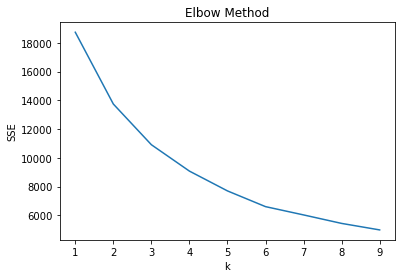

In [39]:
# fiting scaled data and displaying KMeans plot
sse = {}
K = range(1, 10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [40]:
# Create a KMeans model with 4 clusters
model = KMeans(n_clusters=4, random_state=42).fit(X_scaled)

In [41]:
#calculate the clusters
y_pred = model.predict(X_scaled)
len(y_pred)
#print(y_pred)

3123

In [42]:
#merge cluster results to the oroginal df
df_y=pd.DataFrame(y_pred,columns=['Cluster'])
df_y.tail()

Cluster
3118        0
3119        0
3120        2
3121        2
3122        2

In [43]:
model_demo_df.tail()

FIPS  2013 Rural-urban Continuum Code  Population_2010  \
3118  56037                              5.0            43806   
3119  56039                              7.0            21294   
3120  56041                              7.0            21118   
3121  56043                              7.0             8533   
3122  56045                              7.0             7208   

      Civilian_labor_force_2020  Unemployment_rate_2020  \
3118                      20840                     7.4   
3119                      15204                     6.0   
3120                       9312                     6.3   
3121                       4004                     5.3   
3122                       3836                     3.9   

      Median_Household_Income_2019  Med_HH_Income_Percent_of_State_Total_2019  
3118                         80639                                      121.9  
3119                         98837                                      149.4  
3120                         70756                                      107.0  
3121                         55122                                       83.3  
3122                         59410                                       89.8

In [44]:
county_cluster_df=model_demo_df.join(df_y,how='inner')
county_cluster_df.tail()

FIPS  2013 Rural-urban Continuum Code  Population_2010  \
3118  56037                              5.0            43806   
3119  56039                              7.0            21294   
3120  56041                              7.0            21118   
3121  56043                              7.0             8533   
3122  56045                              7.0             7208   

      Civilian_labor_force_2020  Unemployment_rate_2020  \
3118                      20840                     7.4   
3119                      15204                     6.0   
3120                       9312                     6.3   
3121                       4004                     5.3   
3122                       3836                     3.9   

      Median_Household_Income_2019  Med_HH_Income_Percent_of_State_Total_2019  \
3118                         80639                                      121.9   
3119                         98837                                      149.4   
3120                         70756                                      107.0   
3121                         55122                                       83.3   
3122                         59410                                       89.8   

      Cluster  
3118        0  
3119        0  
3120        2  
3121        2  
3122        2

In [45]:
county_cluster_df.describe()

FIPS  2013 Rural-urban Continuum Code  Population_2010  \
count   3123.000000                      3123.000000     3.123000e+03   
mean   30476.618636                         4.999680     9.879048e+04   
std    15083.203599                         2.702468     3.138219e+05   
min     1001.000000                         1.000000     8.200000e+01   
25%    19012.000000                         2.000000     1.120700e+04   
50%    29185.000000                         6.000000     2.599200e+04   
75%    45082.000000                         7.000000     6.708400e+04   
max    56045.000000                         9.000000     9.818605e+06   

       Civilian_labor_force_2020  Unemployment_rate_2020  \
count               3.123000e+03             3123.000000   
mean                5.139124e+04                6.726705   
std                 1.661893e+05                2.250591   
min                 1.840000e+02                1.700000   
25%                 4.851000e+03                5.200000   
50%                 1.164200e+04                6.500000   
75%                 3.156150e+04                8.000000   
max                 4.921499e+06               22.500000   

       Median_Household_Income_2019  \
count                   3123.000000   
mean                   55657.632405   
std                    14425.507766   
min                    24732.000000   
25%                    46228.500000   
50%                    53306.000000   
75%                    61885.500000   
max                   151806.000000   

       Med_HH_Income_Percent_of_State_Total_2019      Cluster  
count                                3123.000000  3123.000000  
mean                                   89.466411     1.880243  
std                                    19.817422     1.164994  
min                                    39.900000     0.000000  
25%                                    76.450000     1.000000  
50%                                    86.800000     2.000000  
75%                                    99.400000     3.000000  
max                                   234.500000     3.000000

In [46]:
county_cluster_df['Cluster'].value_counts()

3    1186
2    1145
0     768
1      24
Name: Cluster, dtype: int64

In [47]:
county_cluster_df=pd.merge(county_cluster_df,demographics_df[['FIPS','State']],on='FIPS',how='left')
county_cluster_df.head()

FIPS  2013 Rural-urban Continuum Code  Population_2010  \
0  1001                              2.0            54571   
1  1003                              3.0           182265   
2  1005                              6.0            27457   
3  1007                              1.0            22915   
4  1009                              1.0            57322   

   Civilian_labor_force_2020  Unemployment_rate_2020  \
0                      25838                     4.9   
1                      96763                     5.6   
2                       8587                     7.0   
3                       8640                     6.6   
4                      24661                     4.1   

   Median_Household_Income_2019  Med_HH_Income_Percent_of_State_Total_2019  \
0                         58233                                      112.5   
1                         59871                                      115.6   
2                         35972                                       69.5   
3                         47918                                       92.6   
4                         52902                                      102.2   

   Cluster State  
0        0    AL  
1        0    AL  
2        3    AL  
3        3    AL  
4        0    AL

In [48]:
county_cluster_df=pd.merge(county_cluster_df,brewery_count_df[['Brewery_Count']],on='FIPS',how='left')

In [49]:
county_cluster_df.head()

FIPS  2013 Rural-urban Continuum Code  Population_2010  \
0  1001                              2.0            54571   
1  1003                              3.0           182265   
2  1005                              6.0            27457   
3  1007                              1.0            22915   
4  1009                              1.0            57322   

   Civilian_labor_force_2020  Unemployment_rate_2020  \
0                      25838                     4.9   
1                      96763                     5.6   
2                       8587                     7.0   
3                       8640                     6.6   
4                      24661                     4.1   

   Median_Household_Income_2019  Med_HH_Income_Percent_of_State_Total_2019  \
0                         58233                                      112.5   
1                         59871                                      115.6   
2                         35972                                       69.5   
3                         47918                                       92.6   
4                         52902                                      102.2   

   Cluster State  Brewery_Count  
0        0    AL            NaN  
1        0    AL            3.0  
2        3    AL            NaN  
3        3    AL            NaN  
4        0    AL            NaN

In [50]:
county_cluster_df['Brewery_Count']=county_cluster_df['Brewery_Count'].fillna(0)

In [51]:
county_cluster_df.tail(5)

FIPS  2013 Rural-urban Continuum Code  Population_2010  \
3118  56037                              5.0            43806   
3119  56039                              7.0            21294   
3120  56041                              7.0            21118   
3121  56043                              7.0             8533   
3122  56045                              7.0             7208   

      Civilian_labor_force_2020  Unemployment_rate_2020  \
3118                      20840                     7.4   
3119                      15204                     6.0   
3120                       9312                     6.3   
3121                       4004                     5.3   
3122                       3836                     3.9   

      Median_Household_Income_2019  Med_HH_Income_Percent_of_State_Total_2019  \
3118                         80639                                      121.9   
3119                         98837                                      149.4   
3120                         70756                                      107.0   
3121                         55122                                       83.3   
3122                         59410                                       89.8   

      Cluster State  Brewery_Count  
3118        0    WY            1.0  
3119        0    WY            5.0  
3120        2    WY            1.0  
3121        2    WY            1.0  
3122        2    WY            0.0

In [52]:
output_data_file = "../Resources/data/cluster.csv"

In [53]:
county_cluster_df.to_csv(output_data_file)

In [54]:
county_cluster0_df=county_cluster_df.loc[(county_cluster_df["Cluster"]==0)]
county_cluster0_df.head()

FIPS  2013 Rural-urban Continuum Code  Population_2010  \
0   1001                              2.0            54571   
1   1003                              3.0           182265   
4   1009                              1.0            57322   
10  1021                              1.0            43643   
15  1031                              4.0            49948   

    Civilian_labor_force_2020  Unemployment_rate_2020  \
0                       25838                     4.9   
1                       96763                     5.6   
4                       24661                     4.1   
10                      19592                     5.0   
15                      21502                     4.4   

    Median_Household_Income_2019  Med_HH_Income_Percent_of_State_Total_2019  \
0                          58233                                      112.5   
1                          59871                                      115.6   
4                          52902                                      102.2   
10                         49692                                       96.0   
15                         57299                                      110.7   

    Cluster State  Brewery_Count  
0         0    AL            0.0  
1         0    AL            3.0  
4         0    AL            0.0  
10        0    AL            0.0  
15        0    AL            0.0

In [55]:
county_cluster0_df.describe()

FIPS  2013 Rural-urban Continuum Code  Population_2010  \
count    768.000000                       768.000000     7.680000e+02   
mean   30364.692708                         2.075521     2.059963e+05   
std    15444.964189                         1.421395     2.577017e+05   
min     1001.000000                         1.000000     8.200000e+01   
25%    18060.500000                         1.000000     3.908800e+04   
50%    29617.000000                         2.000000     1.022000e+05   
75%    45008.500000                         3.000000     2.629032e+05   
max    56039.000000                         9.000000     1.418788e+06   

       Civilian_labor_force_2020  Unemployment_rate_2020  \
count                 768.000000              768.000000   
mean               114205.213542                6.560286   
std                144914.628581                1.608565   
min                   289.000000                1.700000   
25%                 20685.500000                5.400000   
50%                 55732.000000                6.350000   
75%                143995.500000                7.600000   
max                754552.000000               12.600000   

       Median_Household_Income_2019  \
count                    768.000000   
mean                   72326.858073   
std                    14837.424495   
min                    48945.000000   
25%                    62163.500000   
50%                    68643.000000   
75%                    79482.500000   
max                   151806.000000   

       Med_HH_Income_Percent_of_State_Total_2019  Cluster  Brewery_Count  
count                                 768.000000    768.0     768.000000  
mean                                  112.799609      0.0       6.748698  
std                                    18.740752      0.0      10.509727  
min                                    75.200000      0.0       0.000000  
25%                                   100.100000      0.0       1.000000  
50%                                   108.850000      0.0       3.000000  
75%                                   121.325000      0.0       8.000000  
max                                   234.500000      0.0      89.000000

In [56]:
county_cluster1_df=county_cluster_df.loc[(county_cluster_df["Cluster"]==1)]

In [57]:
county_cluster2_df=county_cluster_df.loc[(county_cluster_df["Cluster"]==2)]

In [58]:
county_cluster3_df=county_cluster_df.loc[(county_cluster_df["Cluster"]==3)]

In [59]:
output_data_file = "../Resources/data/cluster0.csv"

In [60]:
county_cluster0_df.to_csv(output_data_file)

In [61]:
output_data_file = "../Resources/data/.csv"

In [62]:
county_cluster1_df.to_csv(output_data_file)

In [63]:
output_data_file = "../Resources/data/cluster2.csv"

In [64]:
county_cluster2_df.to_csv(output_data_file)

### PCA review

In [65]:
demo_pca_scaled=StandardScaler().fit_transform(model_demo_df)
print(demo_pca_scaled[0:5])

[[-1.95451442 -1.11015583 -0.14092884 -0.15378445 -0.81178562  0.17855732
   1.16247604]
 [-1.9543818  -0.74006439  0.26603587  0.27305616 -0.50070643  0.29212437
   1.3189291 ]
 [-1.95424918  0.37020995 -0.22734199 -0.25760436  0.12145194 -1.36485905
  -1.0076794 ]
 [-1.95411656 -1.48024728 -0.24181749 -0.2572854  -0.0563076  -0.53661001
   0.15814829]
 [-1.95398394 -1.48024728 -0.13216132 -0.16086787 -1.16730469 -0.19105558
   0.6426481 ]]


In [66]:
# Initialize PCA model
pca = PCA(n_components=3)

# Get two principal components for the data.
county_demo_pca = pca.fit_transform(demo_pca_scaled)

In [67]:
county_demo_pca=pd.DataFrame(
    data=county_demo_pca,columns=['pc1','pc2','pc3'])
county_demo_pca.head()

pc1       pc2       pc3
0  0.852797 -1.053517  1.646442
1  1.234020 -0.661689  1.713015
2 -1.379273  1.136894  1.581626
3  0.223661 -0.012683  1.171294
4  0.596618 -0.831755  1.733647

In [68]:
pca.explained_variance_ratio_

array([0.39822176, 0.22979692, 0.14935864])

In [69]:
model== KMeans(n_clusters=3, random_state=15)

# Fit the model
model.fit(county_demo_pca)

# Predict clusters
predictions = model.predict(county_demo_pca)


# Add the predicted class columns
county_demo_pca["pca_class"] = model.labels_
county_demo_pca.head()

pc1       pc2       pc3  pca_class
0  0.852797 -1.053517  1.646442          2
1  1.234020 -0.661689  1.713015          3
2 -1.379273  1.136894  1.581626          2
3  0.223661 -0.012683  1.171294          2
4  0.596618 -0.831755  1.733647          2

In [70]:
fig = px.scatter_3d(
     county_demo_pca,
     x="pc1",
     y="pc2",
     z="pc3",
     color="pca_class",
     symbol="pca_class",
     width=800,
 )
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [71]:
pca_cluster_df=model_demo_df.join(county_demo_pca,how='inner')
pca_cluster_df['pca_class'].value_counts()

2    1246
0    1137
3     710
1      30
Name: pca_class, dtype: int64

In [72]:
output_data_file = "../Resources/data/pca_cluster.csv"

In [73]:
pca_cluster_df.to_csv(output_data_file)

# Explore linear regresion model


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [75]:
lr_df=county_cluster_df.drop(county_cluster_df.columns[8:9],axis=1)
lr_df
#demographics_df=demographics_df.drop(demographics_df.columns[cols],axis=1)

FIPS  2013 Rural-urban Continuum Code  Population_2010  \
0      1001                              2.0            54571   
1      1003                              3.0           182265   
2      1005                              6.0            27457   
3      1007                              1.0            22915   
4      1009                              1.0            57322   
...     ...                              ...              ...   
3118  56037                              5.0            43806   
3119  56039                              7.0            21294   
3120  56041                              7.0            21118   
3121  56043                              7.0             8533   
3122  56045                              7.0             7208   

      Civilian_labor_force_2020  Unemployment_rate_2020  \
0                         25838                     4.9   
1                         96763                     5.6   
2                          8587                     7.0   
3                          8640                     6.6   
4                         24661                     4.1   
...                         ...                     ...   
3118                      20840                     7.4   
3119                      15204                     6.0   
3120                       9312                     6.3   
3121                       4004                     5.3   
3122                       3836                     3.9   

      Median_Household_Income_2019  Med_HH_Income_Percent_of_State_Total_2019  \
0                            58233                                      112.5   
1                            59871                                      115.6   
2                            35972                                       69.5   
3                            47918                                       92.6   
4                            52902                                      102.2   
...                            ...                                        ...   
3118                         80639                                      121.9   
3119                         98837                                      149.4   
3120                         70756                                      107.0   
3121                         55122                                       83.3   
3122                         59410                                       89.8   

      Cluster  Brewery_Count  
0           0            0.0  
1           0            3.0  
2           3            0.0  
3           3            0.0  
4           0            0.0  
...       ...            ...  
3118        0            1.0  
3119        0            5.0  
3120        2            1.0  
3121        2            1.0  
3122        2            0.0  

[3123 rows x 9 columns]

In [76]:
lr_df=lr_df.loc[(lr_df['Cluster']==0)]

In [77]:
lr_df.describe()

FIPS  2013 Rural-urban Continuum Code  Population_2010  \
count    768.000000                       768.000000     7.680000e+02   
mean   30364.692708                         2.075521     2.059963e+05   
std    15444.964189                         1.421395     2.577017e+05   
min     1001.000000                         1.000000     8.200000e+01   
25%    18060.500000                         1.000000     3.908800e+04   
50%    29617.000000                         2.000000     1.022000e+05   
75%    45008.500000                         3.000000     2.629032e+05   
max    56039.000000                         9.000000     1.418788e+06   

       Civilian_labor_force_2020  Unemployment_rate_2020  \
count                 768.000000              768.000000   
mean               114205.213542                6.560286   
std                144914.628581                1.608565   
min                   289.000000                1.700000   
25%                 20685.500000                5.400000   
50%                 55732.000000                6.350000   
75%                143995.500000                7.600000   
max                754552.000000               12.600000   

       Median_Household_Income_2019  \
count                    768.000000   
mean                   72326.858073   
std                    14837.424495   
min                    48945.000000   
25%                    62163.500000   
50%                    68643.000000   
75%                    79482.500000   
max                   151806.000000   

       Med_HH_Income_Percent_of_State_Total_2019  Cluster  Brewery_Count  
count                                 768.000000    768.0     768.000000  
mean                                  112.799609      0.0       6.748698  
std                                    18.740752      0.0      10.509727  
min                                    75.200000      0.0       0.000000  
25%                                   100.100000      0.0       1.000000  
50%                                   108.850000      0.0       3.000000  
75%                                   121.325000      0.0       8.000000  
max                                   234.500000      0.0      89.000000

In [78]:
print(lr_df.columns)
lr_df=lr_df.set_index('FIPS')

Index(['FIPS', '2013 Rural-urban Continuum Code', 'Population_2010',
       'Civilian_labor_force_2020', 'Unemployment_rate_2020',
       'Median_Household_Income_2019',
       'Med_HH_Income_Percent_of_State_Total_2019', 'Cluster',
       'Brewery_Count'],
      dtype='object')


In [79]:
print(lr_df.index)

Int64Index([ 1001,  1003,  1009,  1021,  1031,  1051,  1073,  1081,  1083,
             1089,
            ...
            55127, 55131, 55133, 55139, 56005, 56009, 56021, 56025, 56037,
            56039],
           dtype='int64', name='FIPS', length=768)


In [80]:
lr_X=lr_df.drop(['Brewery_Count'],axis =1)

In [81]:
lr_y=lr_df['Brewery_Count']

In [82]:
lr_X_train,lr_X_test,lr_y_train,lr_y_test=train_test_split(lr_X,lr_y,test_size=0.2,random_state=15)

In [83]:
scaler = StandardScaler()


In [84]:
train_scaled=scaler.fit_transform(lr_X_train)

In [85]:
test_scaled = scaler.transform(lr_X_test)

In [86]:
lr_model=LinearRegression()

In [87]:
lr_model.fit(train_scaled,lr_y_train)

LinearRegression()

In [88]:
mse = mean_squared_error(lr_y_train, lr_model.predict(train_scaled))
mae = mean_absolute_error(lr_y_train, lr_model.predict(train_scaled))

In [89]:
print("mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse))

mse =  42.627389225448404  & mae =  3.8416034011399596  & rmse =  6.528965402377961


In [90]:
test_mse = mean_squared_error(lr_y_test, lr_model.predict(test_scaled))
test_mae = mean_absolute_error(lr_y_test, lr_model.predict(test_scaled))
print("mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse))

mse =  99.68264595768473  & mae =  4.128556046780566  & rmse =  9.98411968866984


In [91]:
lr_X_train


2013 Rural-urban Continuum Code  Population_2010  \
FIPS                                                      
24031                              1.0           971777   
24009                              1.0            88737   
40017                              1.0           115541   
48011                              2.0             1901   
39063                              4.0            74782   
...                                ...              ...   
16055                              3.0           138494   
30009                              3.0            10078   
48301                              9.0               82   
55117                              3.0           115507   
37025                              1.0           178011   

       Civilian_labor_force_2020  Unemployment_rate_2020  \
FIPS                                                       
24031                     548398                     6.3   
24009                      48543                     5.2   
40017                      76026                     6.0   
48011                        914                     4.3   
39063                      41803                     6.8   
...                          ...                     ...   
16055                      81286                     6.9   
30009                       5567                     6.0   
48301                        289                     1.7   
55117                      61510                     5.7   
37025                     108444                     7.0   

       Median_Household_Income_2019  \
FIPS                                  
24031                        110012   
24009                        111056   
40017                         75111   
48011                         64424   
39063                         62720   
...                             ...   
16055                         62764   
30009                         57585   
48301                         88487   
55117                         62108   
37025                         72071   

       Med_HH_Income_Percent_of_State_Total_2019  Cluster  
FIPS                                                       
24031                                      127.0        0  
24009                                      128.2        0  
40017                                      138.0        0  
48011                                      100.6        0  
39063                                      106.8        0  
...                                          ...      ...  
16055                                      103.2        0  
30009                                      100.6        0  
48301                                      138.2        0  
55117                                       96.8        0  
37025                                      125.6        0  

[614 rows x 7 columns]

In [92]:
lr_y_train.head()

FIPS
24031    11.0
24009     7.0
40017     0.0
48011     0.0
39063     3.0
Name: Brewery_Count, dtype: float64

In [93]:
lr_model.score(lr_X_train, lr_y_train)

-7488285253.566557